In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import itertools
import json

%matplotlib inline

In [ ]:
df = pd.read_csv('./dataset_groups/whole_body_datasets/KORA/KORA-diabetes-english.csv')
df.dropna(inplace=True)
# -1: 'nan', 0: 'normal', 1: 'pre-diabetes', 2: 'type-2-diabetes', 3: 'type-1-diabetes'
# df.diabetes_status = pd.factorize(df.diabetes_status)[0]
# # df[df.diabetes_status == -1] = None
# # 0= Female, 1= Male
# df.sex = pd.get_dummies(df[['sex']], drop_first=True)
# #  -1: 'nan', 0: 'no', 1: 'yes']
# df['mri-liver-fat-artifacts'] = pd.factorize(df['mri-liver-fat-artifacts'])[0]

# # 0: 'regular', 1: 'former', 2: 'non-smoker', 3: 'irregular'
# df.smoker = pd.factorize(df.smoker)[0]
# # 0: 'normal', 1: 'pre-obisety', 2: 'obesity class I', 3: 'obesity class II',
# # 4: 'obesity class III', 5: 'underweight'
# df['bmi-who'] = pd.factorize(df['bmi-who'])[0]

# print(df.shape)
df.head()

[0 1]
[0 1]


,age,alcohol-g/day,blood-pressure-diastolic,blood-pressure-systolic,bmi-numeric,bmi-who,cholesterol-hdl,cholesterol-ldl,cholesterol-total,diabetes_status,...,mri-liver-fat-artifacts,mri-liver-fat-lobus-dexter,mri-liver-fat-lobus-sinister,mri-liver-fat-portal-vein,mrt-image-id,sex,smoker,smoking-packages,triglyceride,weight
0,60.0,2.86,68.5,103.0,23.86,normal,62.0,223.0,326.0,normal,...,no,3.00,3.20,1.09,2461930.0,0,regular,22.50,185.0,58.0
1,50.0,45.71,71.0,114.5,23.51,normal,80.8,163.0,252.0,normal,...,no,3.39,2.36,2.49,2457719.0,1,regular,8.20,70.3,74.5
2,54.0,24.14,91.5,142.0,26.95,pre-obisety,60.0,172.0,250.0,normal,...,no,7.46,5.50,4.85,2453427.0,1,former,1.30,75.0,76.6
3,66.0,5.71,77.0,126.5,25.75,pre-obisety,49.0,167.0,218.0,normal,...,no,5.49,5.81,6.04,2459365.0,1,non-smoker,0.00,79.0,91.1
4,52.0,10.07,82.5,126.0,28.15,pre-obisety,41.0,86.0,149.0,normal,...,no,18.40,20.10,19.60,2462054.0,1,regular,36.25,73.0,83.1


Index(['age', 'alcohol-g/day', 'blood-pressure-diastolic',
       'blood-pressure-systolic', 'bmi-numeric', 'bmi-who', 'cholesterol-hdl',
       'cholesterol-ldl', 'cholesterol-total', 'diabetes_status',
       'hba1c-mmol/mol', 'hba1c-percentage', 'height', 'hypertension',
       'meds-antidiabetic', 'meds-antihypertensive', 'meds-incretin-mimetics',
       'meds-insulin-therapy', 'meds-lipoprotein-lowering',
       'meds-oral-antidiabetic', 'mri-liver-fat-artifacts',
       'mri-liver-fat-lobus-dexter', 'mri-liver-fat-lobus-sinister',
       'mri-liver-fat-portal-vein', 'mrt-image-id', 'sex', 'smoker',
       'smoking-packages', 'triglyceride', 'weight'],
      dtype='object')


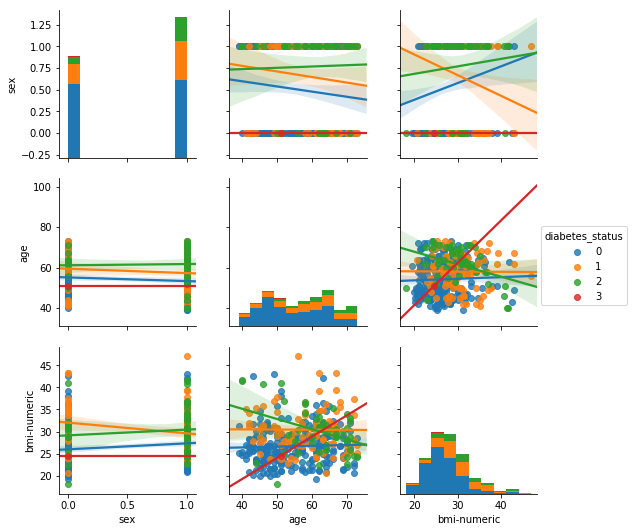

In [80]:
seaborn.pairplot(df, vars=['sex', 'age', 'bmi-numeric'],
                 kind='reg', hue='diabetes_status')

print(df.columns)

In [97]:
# Index(['age', 'alcohol-g/day', 'blood-pressure-diastolic',
#        'blood-pressure-systolic', 'bmi-numeric', 'bmi-who', 'cholesterol-hdl',
#        'cholesterol-ldl', 'cholesterol-total', 'diabetes_status',
#        'hba1c-mmol/mol', 'hba1c-percentage', 'height', 'hypertension',
#        'meds-antidiabetic', 'meds-antihypertensive', 'meds-incretin-mimetics',
#        'meds-insulin-therapy', 'meds-lipoprotein-lowering',
#        'meds-oral-antidiabetic', 'mri-liver-fat-artifacts',
#        'mri-liver-fat-lobus-dexter', 'mri-liver-fat-lobus-sinister',
#        'mri-liver-fat-portal-vein', 'mrt-image-id', 'sex', 'smoker',
#        'smoking-packages', 'triglyceride', 'weight'],
#       dtype='object')

data = df.copy()
y = data["diabetes_status"].copy()
y[y == 3] = None
y.dropna(inplace=True)


X = pd.get_dummies(data.loc[y.index, feats], drop_first=True)

y_classes = np.argmax(pd.get_dummies(y).values, axis=1)

model = LogisticRegression(multi_class="multinomial", solver="lbfgs").fit(X, y_classes)

print(model.score(X, y_classes))

0.7828418230563002




data = df.copy()
y = data["diabetes_status"].copy()
y[y == 3] = None
y.dropna(inplace=True)
y_classes = np.argmax(pd.get_dummies(y).values, axis=1)

best = 0
max_score = {}
for L in range(1, len(feats)+1):
    for subset in itertools.combinations(feats, L):
        X = pd.get_dummies(data.loc[y.index, list(subset)], drop_first=True)
        model = LogisticRegression(multi_class="multinomial", solver="lbfgs").fit(X, y_classes)
        c_score = model.score(X, y_classes)
        max_score[c_score] = subset
        if c_score>best:
            best = c_score
            print(subset, c_score)

np.savetxt('c_model_out.txt', json.dumps(max_score))